In [1]:
import chart_studio
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
sns.set()

In [2]:
chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
chart_studio.tools.set_config_file(world_readable=False)

#### Reelgood.com IMDb

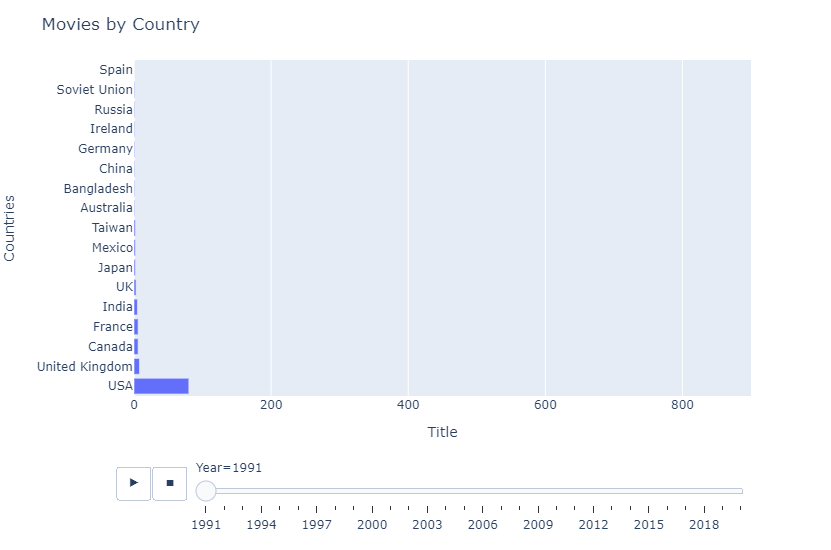

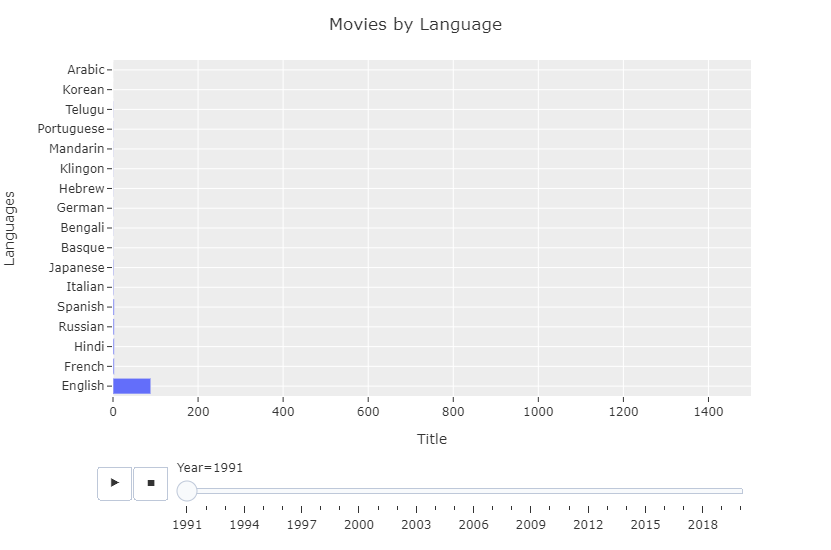

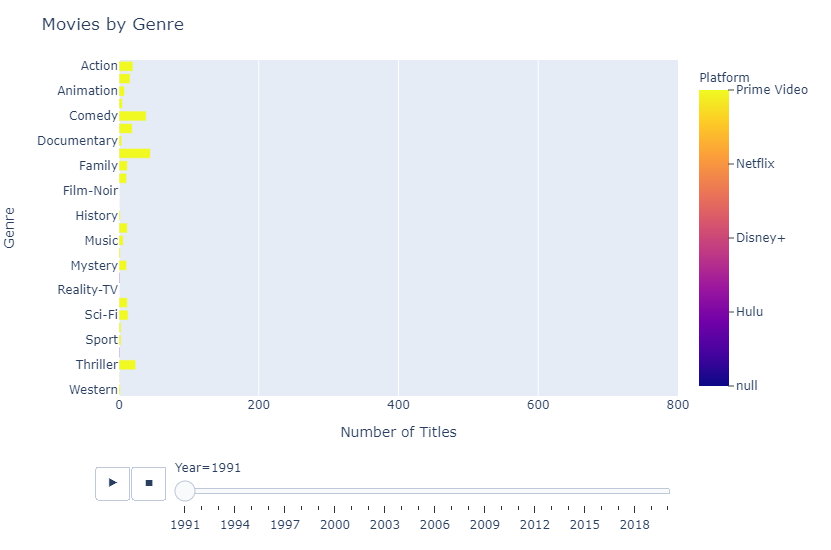

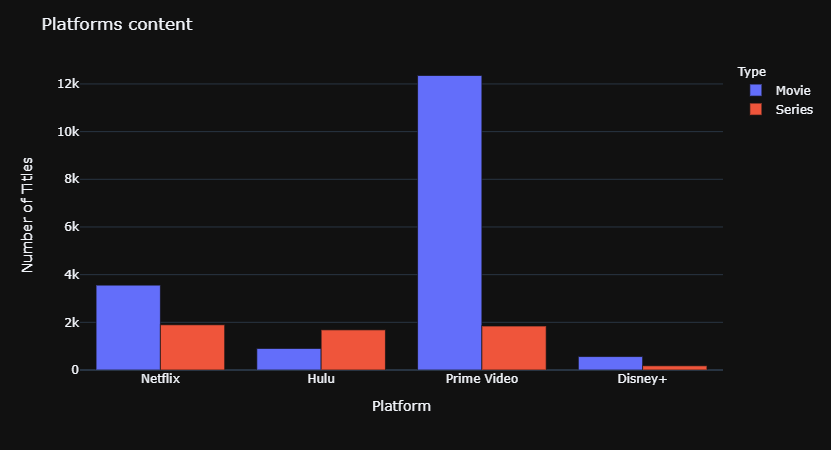

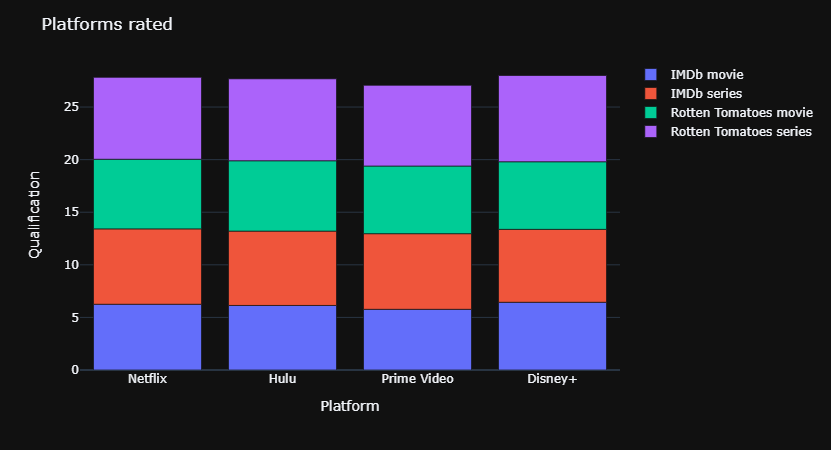

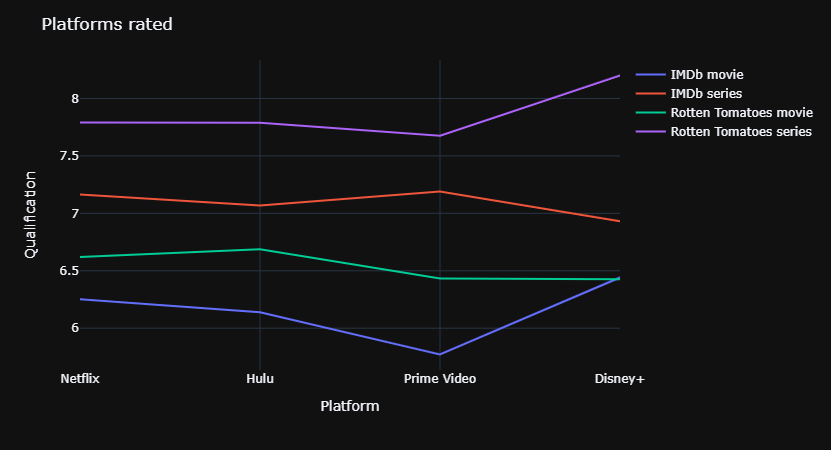

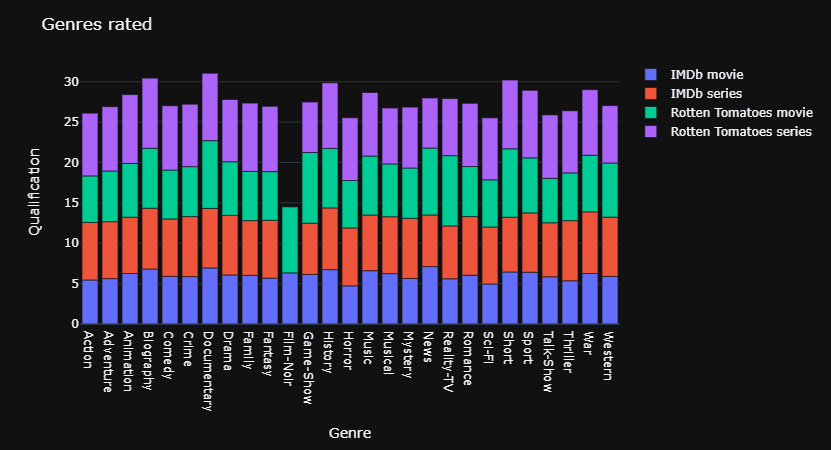

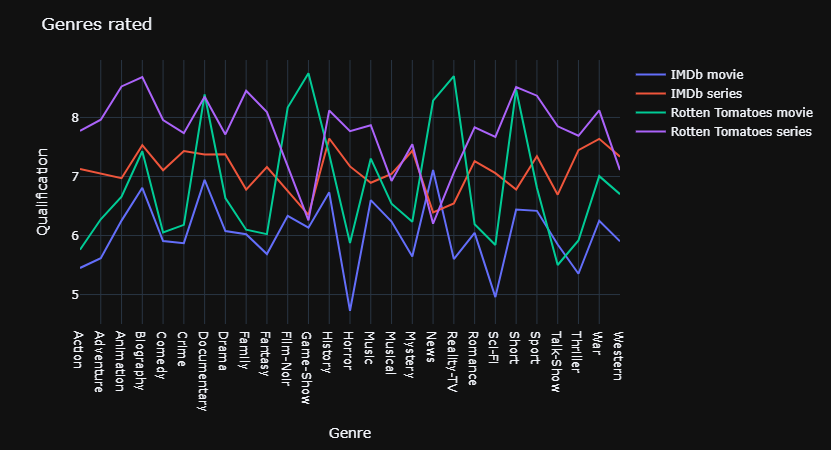

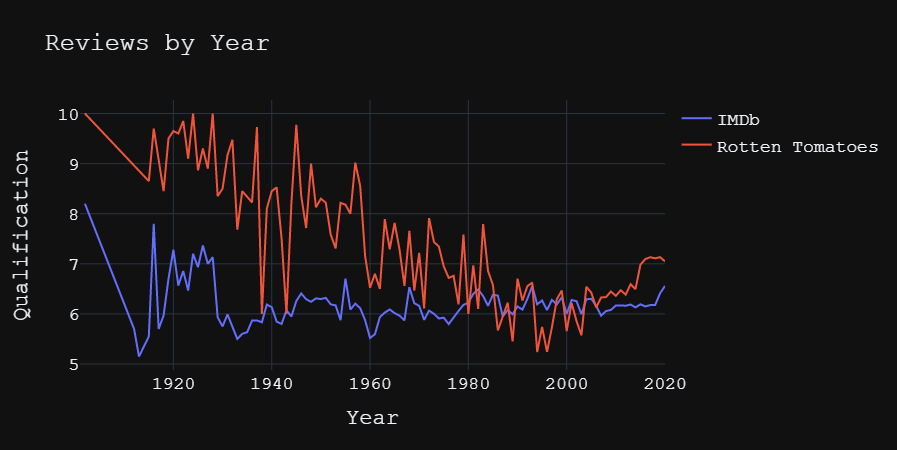

In [109]:
fig3.show()
fig4.show()
fig1.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()
fig9.show()
fig2.show()

In [57]:
dummies=pd.read_csv('Data/dummies.csv')
data=pd.read_csv('Data/full.csv')
big=pd.read_csv('Data/extra_full.csv')

In [58]:
top20_directors=big.groupby('Directors/Creators')['Title'].nunique().sort_values(ascending=False)[2:22].index

In [59]:
genre_year=big.groupby(['Genres','Year','Title'],as_index=False).agg({'Netflix':'mean','Hulu':'mean','Prime Video':'mean','Disney+':'mean'})
genre_year=genre_year.groupby(['Genres','Year'],as_index=False).agg({'Title':'nunique','Netflix':'sum','Hulu':'sum','Prime Video':'sum','Disney+':'sum'})

In [60]:
genre_year=genre_year[genre_year.Year>1990]

In [61]:
for year in genre_year.Year.unique():
    for genre in [x for x in big.Genres.unique() if type(x)==str]:
        if not genre in genre_year[genre_year.Year==year].Genres.unique():
            mini=pd.DataFrame([[genre,year,0,0,0,0,0]],columns=genre_year.columns)
            genre_year=genre_year.append(mini,ignore_index=True)

In [62]:
new=[]
for i in genre_year.index:
    value=genre_year.loc[i,'Netflix':].max()
    row=[]
    if value!=0:
        for j in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
            if genre_year.loc[i,j]==value:
                row.append(j)
    new.append(row)

In [63]:
choose=lambda x:None if len(x)==0 else np.random.choice(x,1)[0]

In [64]:
genre_year['Platform']=[choose(x) for x in new]

In [65]:
genre_year=genre_year.sort_values(['Year','Genres'],ascending=[True,False]).reset_index(drop=True)

In [66]:
platforms=[None,'Hulu','Disney+','Netflix','Prime Video']

In [67]:
num=lambda x:platforms.index(x)

In [68]:
genre_year.Platform=genre_year.Platform.apply(num)

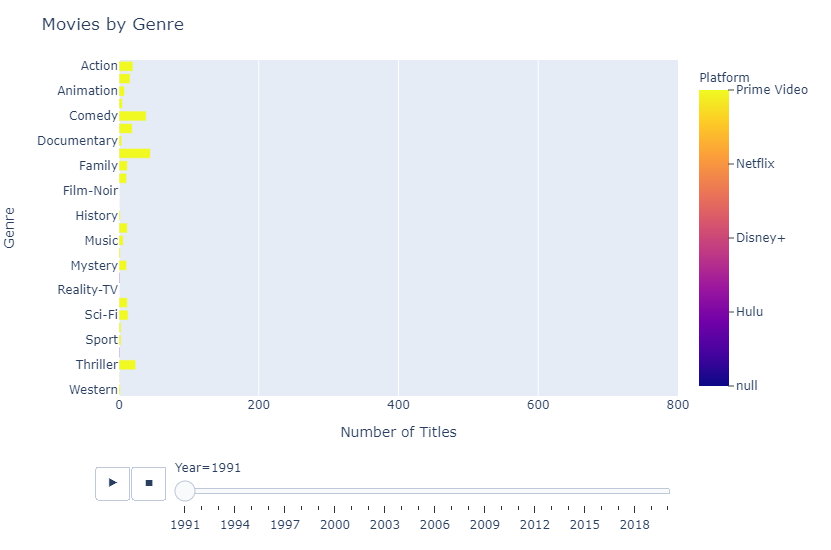

In [69]:
fig1 = px.bar(genre_year, x="Title", y="Genres", animation_frame="Year",width=1100,height=550,color='Platform',
            labels={'Title':'Number of Titles','Genres':'Genre'})
fig1.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=500
fig1.layout.updatemenus[0].buttons[0].args[1]['transition']['duration']=2000
fig1.update_layout(title="Movies by Genre",xaxis=dict(range=[0, 800],autorange=False),
                  coloraxis_colorbar=dict(tickmode="array",tickvals=[0,1,2,3,4],ticktext=platforms,ticks="outside"))
#pio.show(fig)

In [70]:
year_cals=data.groupby('Year').agg({'IMDb':'mean','Rotten Tomatoes':'mean'})

In [71]:
year_cals['Rotten Tomatoes']=year_cals['Rotten Tomatoes']/10

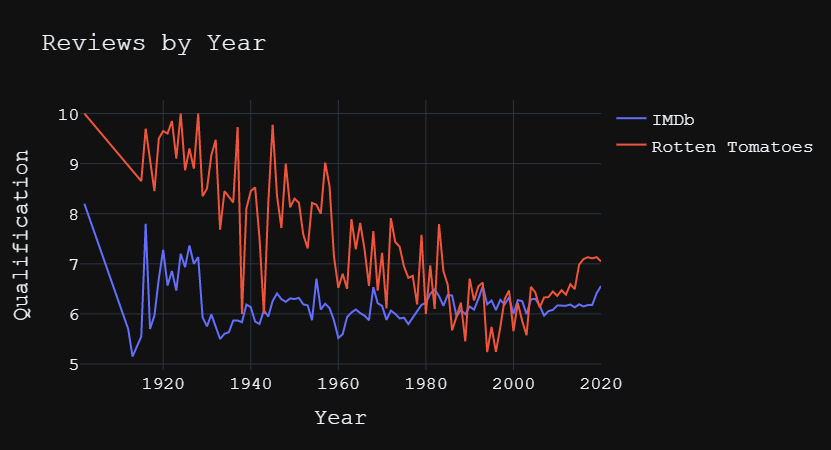

In [72]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=year_cals.index,
    y=year_cals['IMDb'],
    name = 'IMDb', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig2.add_trace(go.Scatter(
    x=year_cals.index,
    y=year_cals['Rotten Tomatoes'],
    name='Rotten Tomatoes',
    connectgaps=True
))
fig2.update_layout(template="plotly_dark",
    title="Reviews by Year",
    xaxis_title="Year",
    yaxis_title="Qualification",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

In [73]:
country_year=big.groupby(['Year','Countries'],as_index=False).agg({'Title':'nunique'})

In [74]:
country_year.Countries=country_year.Countries.apply(lambda x: x if x!='United States' else 'USA')

In [75]:
top10=country_year.sort_values('Title',ascending=False).Countries.unique()[:10]

In [76]:
for year in country_year.Year.unique():
    for country in top10:
        if not country in country_year[country_year.Year==year].Countries.unique():
            mini=pd.DataFrame([[year,country,0]],columns=country_year.columns)
            country_year=country_year.append(mini,ignore_index=True)

In [77]:
country_year=country_year[country_year.Year>1990]

In [78]:
country_year=country_year.groupby(['Year','Countries'],as_index=False).agg({'Title':'sum'}).sort_values(['Year','Title'],ascending=[True,False]).reset_index(drop=True)

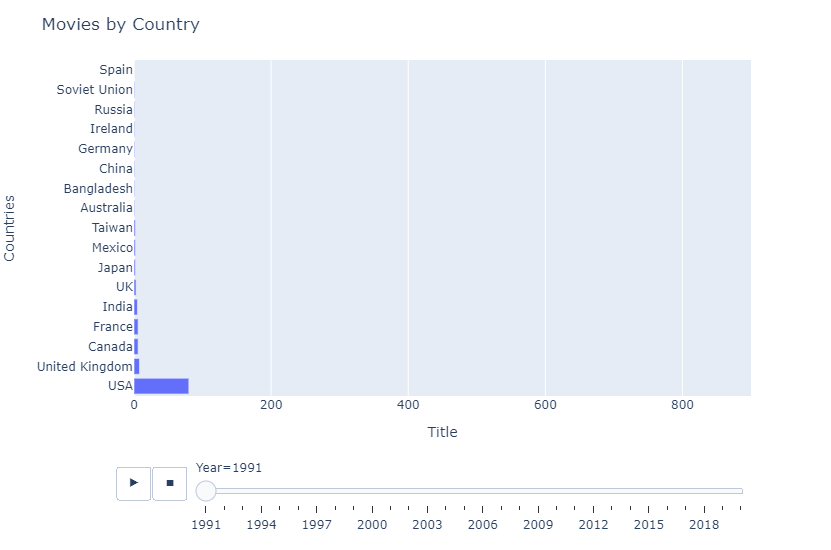

In [79]:
fig3=px.bar(country_year, x="Title", y="Countries",animation_frame="Year",width=1100,height=550)
fig3.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=1000
fig3.layout.updatemenus[0].buttons[0].args[1]['transition']['duration']=2000
fig3.update_layout(title="Movies by Country",xaxis=dict(range=[0, 900],autorange=False))

In [80]:
language_year=big.groupby(['Year','Languages'],as_index=False).agg({'Title':'nunique'})
top10=language_year.sort_values('Title',ascending=False).Languages.unique()[:10]

In [81]:
for year in language_year.Year.unique():
    for language in top10:
        if not language in language_year[language_year.Year==year].Languages.unique():
            mini=pd.DataFrame([[year,language,0]],columns=language_year.columns)
            language_year=language_year.append(mini,ignore_index=True)

In [82]:
language_year=language_year[language_year.Year>1990]
language_year=language_year.sort_values(['Year','Title'],ascending=[True,False]).reset_index(drop=True)

In [83]:
language_year.Title.max()

1447

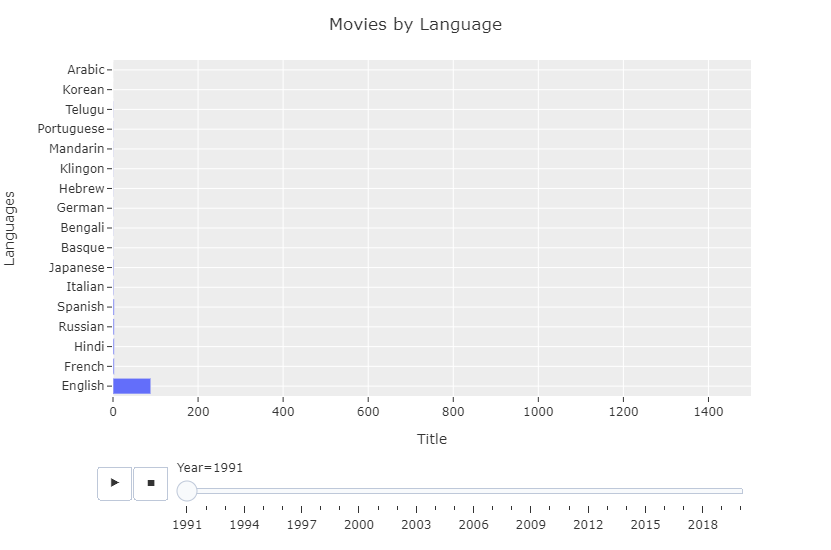

In [84]:
fig4=px.bar(language_year, x="Title", y="Languages",animation_frame="Year",width=1100,height=550)
fig4.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=1000
fig4.layout.updatemenus[0].buttons[0].args[1]['transition']['duration']=2000
fig4.update_layout(title="Movies by Language",xaxis=dict(range=[0, 1500],autorange=False),template='ggplot2')
fig4.show()

In [85]:
netflix=dummies[dummies.Netflix==1]
hulu=dummies[dummies.Hulu==1]
prime=dummies[dummies['Prime Video']==1]
disney=dummies[dummies['Disney+']==1]

In [86]:
streamings=[netflix,hulu,prime,disney]
streaming_names=['Netflix','Hulu','Prime Video','Disney+']
count_types=pd.DataFrame()
for i in range(len(streamings)):
    count_types=count_types.append(streamings[i].groupby('Type',as_index=False).agg({'Title':'nunique'}),ignore_index=True)
count_types['Platform']=np.NaN
for i in range(len(streaming_names)):
    count_types.loc[2*i:2*i+2,'Platform']=streaming_names[i]

In [87]:
count_types['Type']=count_types['Type'].apply(lambda x:'Movie' if x==0 else 'Series')

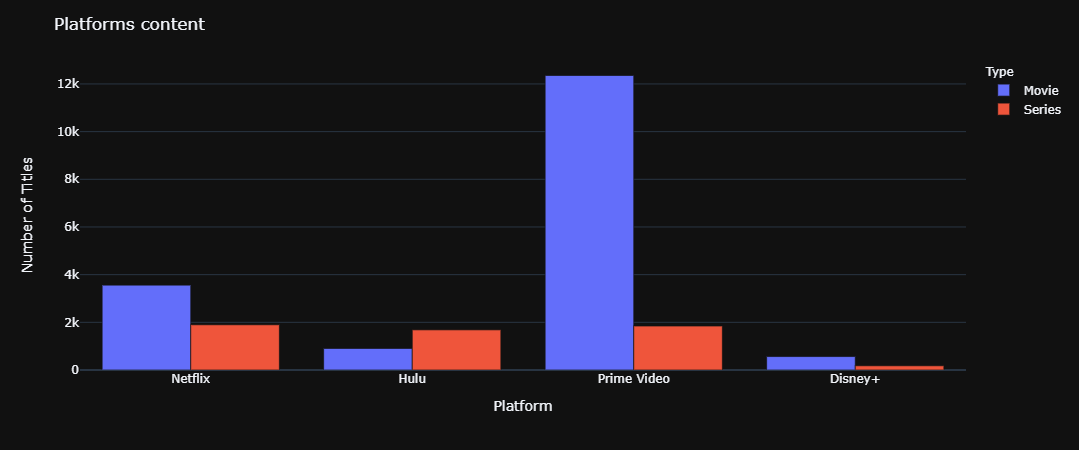

In [88]:
fig5=px.bar(count_types,x='Platform',y='Title',color='Type',barmode='group',
           labels={'Title':'Number of Titles'})
fig5.update_layout(title="Platforms content",template="plotly_dark")
fig5.show()

In [89]:
streamings=[netflix,hulu,prime,disney]
streaming_names=['Netflix','Hulu','Prime Video','Disney+']
mean_streams=pd.DataFrame()
for i in range(len(streamings)):
    mean_streams=mean_streams.append(streamings[i].groupby('Type',as_index=False).agg({'IMDb':'mean','Rotten Tomatoes':'mean'}),ignore_index=True)
mean_streams['Platform']=np.NaN
for i in range(len(streaming_names)):
    mean_streams.loc[2*i:2*i+2,'Platform']=streaming_names[i]

In [90]:
mean_streams['Rotten Tomatoes']=mean_streams['Rotten Tomatoes']/10

In [91]:
mean_streams['Type']=mean_streams['Type'].apply(lambda x:'movie' if x==0 else 'series')

In [92]:
mean_streams=pd.melt(mean_streams, id_vars=['Platform','Type'], value_vars=['IMDb','Rotten Tomatoes'])

In [93]:
mean_streams['variable']=mean_streams['variable']+' '+mean_streams['Type']

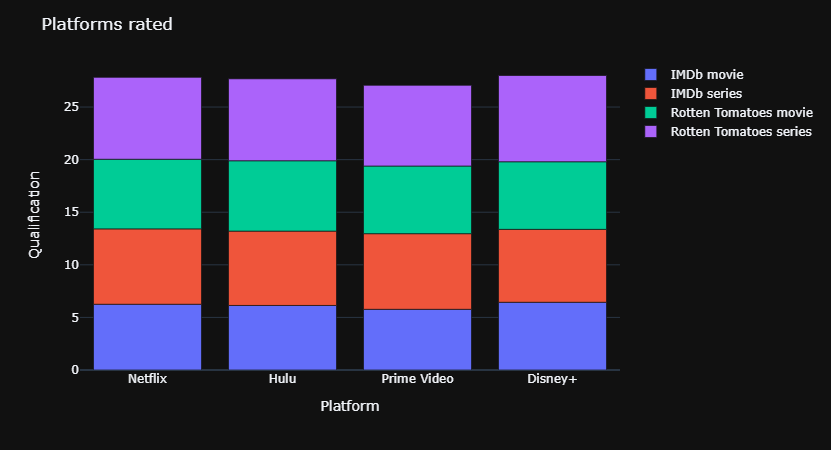

In [94]:
fig6=px.bar(mean_streams,x='Platform',y='value',color='variable',
           labels={'value':'Qualification','variable':''})
fig6.update_layout(title="Platforms rated",template="plotly_dark")
fig6.show()

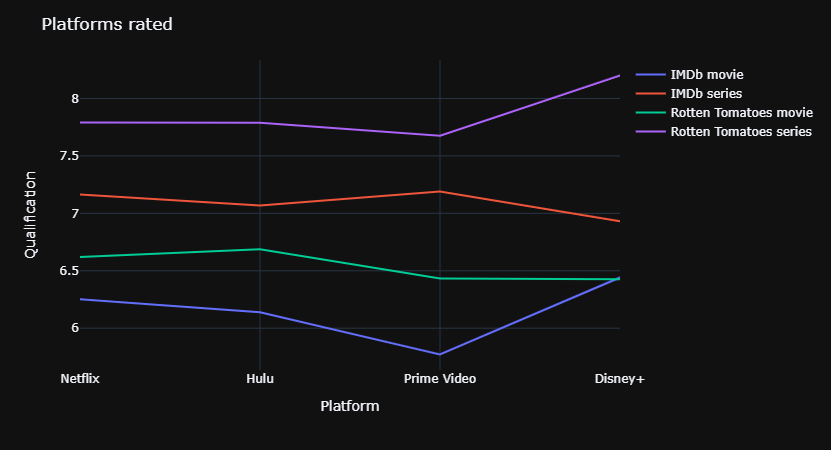

In [95]:
fig7=px.line(mean_streams,x='Platform',y='value',color='variable',labels={'value':'Qualification','variable':''})
fig7.update_layout(title="Platforms rated",template="plotly_dark")
fig7.show()

In [96]:
netflix=dummies[dummies.Netflix==1]
hulu=dummies[dummies.Hulu==1]
prime=dummies[dummies['Prime Video']==1]
disney=dummies[dummies['Disney+']==1]

In [97]:
streamings=[netflix,hulu,prime,disney]
streaming_names=['Netflix','Hulu','Prime Video','Disney+']
mean_streams=pd.DataFrame()
for i in range(len(streamings)):
    mean_streams=mean_streams.append(streamings[i].groupby('Type',as_index=False).agg({'IMDb':'mean','Rotten Tomatoes':'mean'}),ignore_index=True)
count_types['Platform']=np.NaN
for i in range(len(streaming_names)):
    mean_streams.loc[2*i:2*i+2,'Platform']=streaming_names[i]

In [98]:
small_dummies=dummies[dummies.columns[:43]]
genre_names=small_dummies.columns[16:].str.replace('genre_','')

In [99]:
genre_df=[]
for column in small_dummies.columns[16:]:
    genre_df.append(small_dummies[small_dummies[column]==1])

In [100]:
mean_genre=pd.DataFrame()
for i in range(len(genre_df)):
    mean_genre=mean_genre.append(genre_df[i].groupby('Type',as_index=False).agg({'IMDb':'mean','Rotten Tomatoes':'mean'}),ignore_index=True)
mean_genre['Genre']=np.NaN
a=False
for i in range(len(genre_names)):
    if not a:
        if genre_names[i]!='Film-Noir':
            mean_genre.loc[2*i:2*i+2,'Genre']=genre_names[i]
        else:
            mean_genre.loc[2*i,'Genre']=genre_names[i]
            a=True
    else:
        mean_genre.loc[2*i-1:2*i+1,'Genre']=genre_names[i]

In [101]:
mean_genre['Rotten Tomatoes']=mean_genre['Rotten Tomatoes']/10

In [102]:
mean_genre['Type']=mean_genre['Type'].apply(lambda x:'movie' if x==0 else 'series')

In [103]:
mean_genre=pd.melt(mean_genre, id_vars=['Genre','Type'], value_vars=['IMDb','Rotten Tomatoes'])

In [104]:
mean_genre['variable']=mean_genre['variable']+' '+mean_genre['Type']

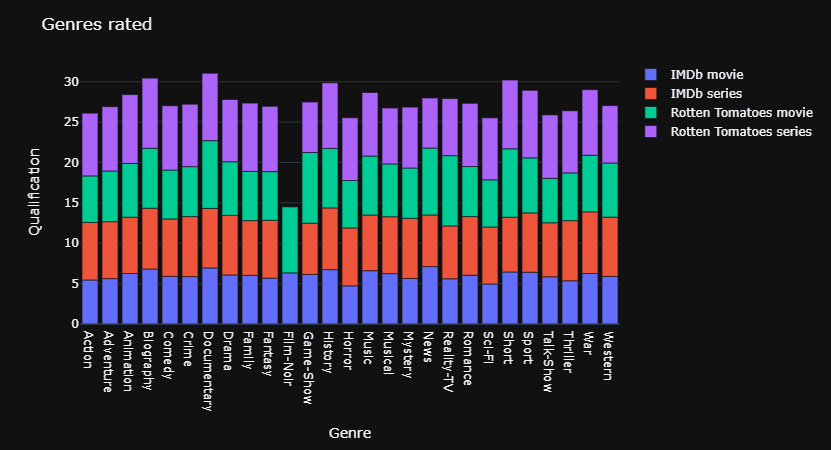

In [105]:
fig8=px.bar(mean_genre,x='Genre',y='value',color='variable',
           labels={'value':'Qualification','variable':''})
fig8.update_layout(title="Genres rated",template="plotly_dark")
fig8.show()

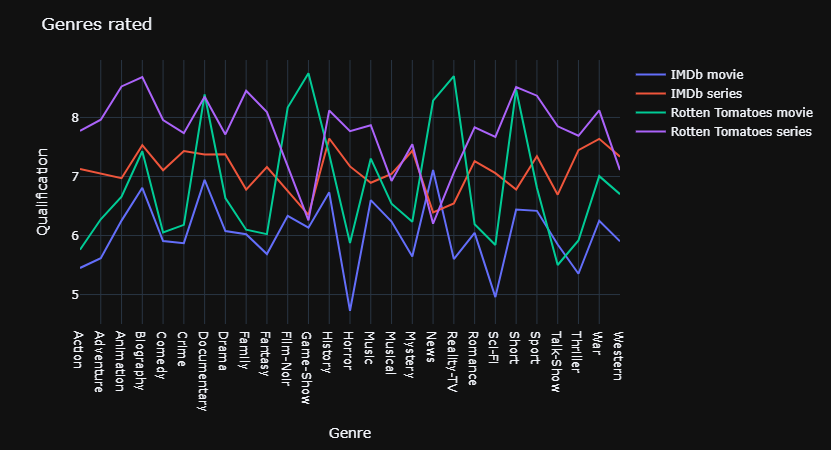

In [106]:
fig9=px.line(mean_genre,x='Genre',y='value',color='variable',labels={'value':'Qualification','variable':''})
fig9.update_layout(title="Genres rated",template="plotly_dark")
fig9.show()

In [107]:
meltes_dummies=pd.melt(small_dummies, id_vars=['Genre','Type'], value_vars=['IMDb','Rotten Tomatoes'])

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Genre']"

In [ ]:
small_dummies

In [ ]:
mean_genre=pd.DataFrame()
for i in range(len(genre_df)):
    mean_genre=mean_genre.append(genre_df[i].groupby('Type',as_index=False).agg({'IMDb':'mean','Rotten Tomatoes':'mean'}),ignore_index=True)
mean_genre['Genre']=np.NaN
a=False
for i in range(len(genre_names)):
    if not a:
        if genre_names[i]!='Film-Noir':
            mean_genre.loc[2*i:2*i+2,'Genre']=genre_names[i]
        else:
            mean_genre.loc[2*i,'Genre']=genre_names[i]
            a=True
    else:
        mean_genre.loc[2*i-1:2*i+1,'Genre']=genre_names[i]